# Carregando pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [61]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto dataframe do pandas.

In [62]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
import pandas as pd
df = pd.read_csv('dados.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


# Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas. Mas sinta-se à vontade para tentar observar outras variáveis.

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


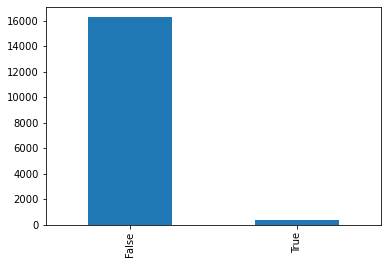

In [63]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

# Tarefa 01 - gráfico de barras
Com base no código da célula anterior, construa um gráfico de barras para pelo menos duas outras variáveis. Dica: Não tente usar as variáveis tempo_emprego e idade pois o gráfico de barras dessa forma como construímos não é adequado para elas.

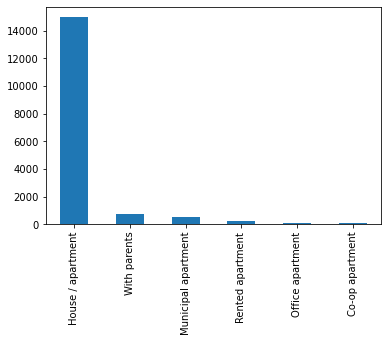

In [64]:
#Grafico1
var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()


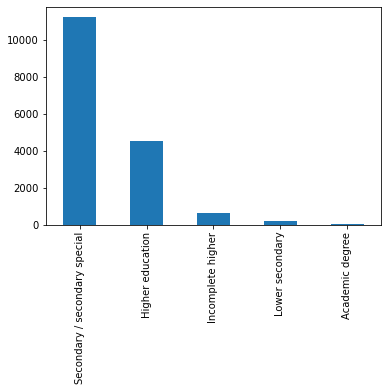

In [65]:
#Grafico2
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

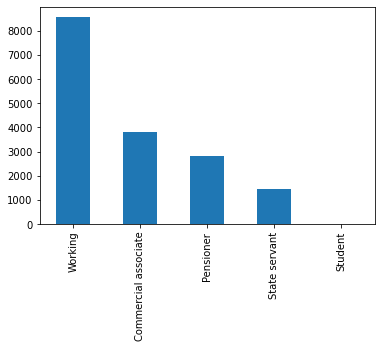

In [66]:
#Grafico3
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

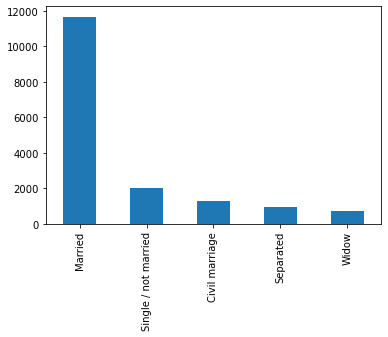

In [67]:
#Grafico4
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

# Tarefa 02 - Histograma 
Com base no código da célula anterior, construa o histograma da variavel dade.

<Figure size 432x288 with 0 Axes>

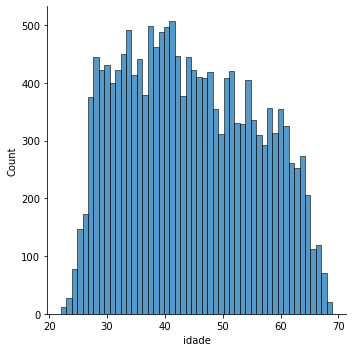

In [68]:
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)
plt.show()

# Tarefa 03 - Bivariada 
Com base no código da célula anterior, construa uma análise bivariada para a variável tempo_emprego. Em seguida, insira uma célula de markdown e conclua se a variável parece discriminar risco de crédito.

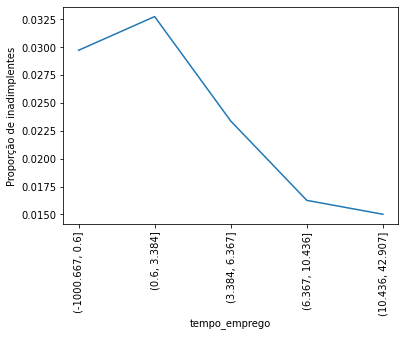

In [69]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 5, retbins= True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

# Analise tarefa 3
O grafico a cima representa uma variavel que pode descriminar o risco de credito pois deixa claro que pessoas com menos tempo de emprego tendem a ser mais inadimplentes.

# Preparacao dos dados


In [70]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [71]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [72]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [73]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


# Etapa4: Modelagem
*Dividindo a base em treino e teste*

In [74]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [75]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
13544,2,36.071233,8.186301,1,1,1,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
13532,0,58.528767,-1000.665753,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1142,0,25.013699,5.767123,1,0,0,0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,1
9689,1,37.663014,17.186301,1,0,0,0,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4144,0,67.575342,-1000.665753,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,1,38.057534,19.397260,1,1,1,0,3.0,0,1,...,0,0,0,0,0,0,1,0,0,0
3919,0,51.690411,15.942466,1,0,0,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3048,1,39.989041,5.383562,1,0,0,0,3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
12866,2,36.093151,6.786301,1,0,0,0,4.0,1,1,...,0,0,0,0,0,0,0,0,0,0


# Tarefa 04 - Bivariada 
Para essa tarefa, crie três células extras, copie nelas o código das três células anteriores (na mesma ordem) e altere o parâmetro n_estimators= da função RandomForestClassifier e insira uma quantidade maior que 3 nesse parâmetro. Rode as três células anteriores para calcular a acurácia do modelo e veja se você consegue uma acurácia melhor.

In [88]:
# Treinar uma Random Forest com 5 árvores
#3
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)
print(clf)
# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

#5
clf = RandomForestClassifier(n_estimators=5)
clf.fit(x_train,y_train)
print(clf)
# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))



#25
clf = RandomForestClassifier(n_estimators=25)
clf.fit(x_train,y_train)
print(clf)
# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))





#50
clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
print(clf)
# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))




#99
clf = RandomForestClassifier(n_estimators=99)
clf.fit(x_train,y_train)
print(clf)
# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

#115
clf = RandomForestClassifier(n_estimators=115)
clf.fit(x_train,y_train)
print(clf)
# Calculando a acuracia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))






# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab


RandomForestClassifier(n_estimators=3)
Acurácia: 97.26%
RandomForestClassifier(n_estimators=5)
Acurácia: 97.67%
RandomForestClassifier(n_estimators=25)
Acurácia: 97.67%
RandomForestClassifier(n_estimators=50)
Acurácia: 97.62%
RandomForestClassifier(n_estimators=99)
Acurácia: 97.65%
RandomForestClassifier(n_estimators=115)
Acurácia: 97.65%
0.016561130053580127


mau,False,True
row_0,,
False,4038,68
True,30,27
